# Time Series Data / NO2 Concentrations in Vienna


### Questions
- How do *NO2 levels* evolve over *time*?
- Are *NO2 levels *weekday* dependent?

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style('white')
%matplotlib inline

In [2]:
df = pd.read_csv('./data/no2.csv.gz', index_col=0, parse_dates=True)
df.head()

,no2
1988-01-01 00:00:00,0.0
1988-01-01 01:00:00,48.8
1988-01-01 02:00:00,66.0
1988-01-01 03:00:00,66.0
1988-01-01 04:00:00,57.4


In [3]:
df.index

DatetimeIndex(['1988-01-01 00:00:00', '1988-01-01 01:00:00',
               '1988-01-01 02:00:00', '1988-01-01 03:00:00',
               '1988-01-01 04:00:00', '1988-01-01 05:00:00',
               '1988-01-01 06:00:00', '1988-01-01 07:00:00',
               '1988-01-01 08:00:00', '1988-01-01 09:00:00',
               ...
               '2012-12-31 14:00:00', '2012-12-31 15:00:00',
               '2012-12-31 16:00:00', '2012-12-31 17:00:00',
               '2012-12-31 18:00:00', '2012-12-31 19:00:00',
               '2012-12-31 20:00:00', '2012-12-31 21:00:00',
               '2012-12-31 22:00:00', '2012-12-31 23:00:00'],
              dtype='datetime64[ns]', length=219168, freq=None)

In [4]:
df.index.min(), df.index.max(), len(df)

(Timestamp('1988-01-01 00:00:00'), Timestamp('2012-12-31 23:00:00'), 219168)

**no2 ~ time**

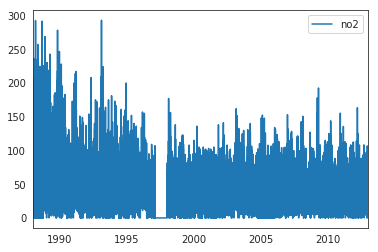

In [5]:
# plot all
fig, ax = plt.subplots()
df.plot(ax=ax)

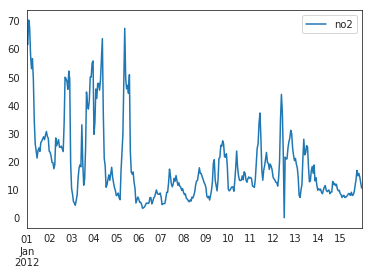

In [6]:
# plot date range to see what is going on
fig, ax = plt.subplots()
df['2012-01':'2012-01-15'].plot(ax=ax)

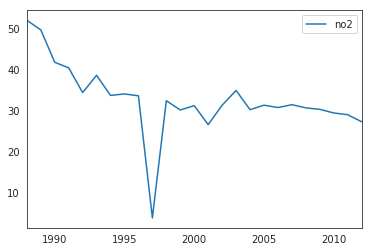

In [7]:
df.resample(rule='1Y').mean().plot()

**no2 ~ weekday**

In [8]:
# add intermediate helper varibles for convenience
df['hour'] = df.index.hour
df['is_weekend'] = df.index.weekday > 4

df_agg = df.groupby(['is_weekend', 'hour'], as_index=False).mean()
df_agg.head()

,is_weekend,hour,no2
0,False,0,32.587879
1,False,1,28.744019
2,False,2,25.880014
3,False,3,24.031366
4,False,4,23.819811


Text(0.5, 0, 'Time of day')

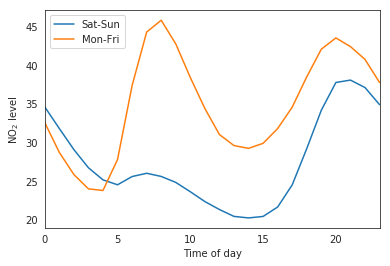

In [9]:
# plot
fig, ax = plt.subplots()
df_agg[df_agg['is_weekend'] == True].plot.line(x='hour', y='no2',
                                               ax=ax, label='Sat-Sun')
df_agg[df_agg['is_weekend'] == False].plot.line(x='hour', y='no2',
                                                ax=ax, label='Mon-Fri')
ax.set_ylabel('NO$_2$ level')
ax.set_xlabel('Time of day')